In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

#### Creating a photo generator from the files

In [3]:
# create a data generator
datagen = ImageDataGenerator()

# load and iterate training dataset
train_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/train/', class_mode='binary', batch_size=64)

# load and iterate test dataset
test_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/test/', class_mode='binary', batch_size=64)

Found 938 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
def plot_clean_and_dirty_photos(train_it, num_pictures=3):
    """
    plot clean and dirty cans from the train labeled data
    the number of pictures will define how much to present in the 
    same time in a matter of rows
    """
    photos, labels = next(train_it)
    clean_id = np.where(labels == 0)[0][:num_pictures]
    dirty_id = np.where(labels == 1)[0][:num_pictures]
    
    fig, ax = plt.subplots(num_pictures, 2, figsize=(12, num_pictures * 3))
    
    for row in range(num_pictures):
        ax[row][0].imshow(photos[clean_id[row]].astype("int"))
        ax[row][0].set_title("clean")

        ax[row][1].imshow(photos[dirty_id[row]].astype("int"))
        ax[row][1].set_title("dirty")
    
    plt.tight_layout()
    plt.show()

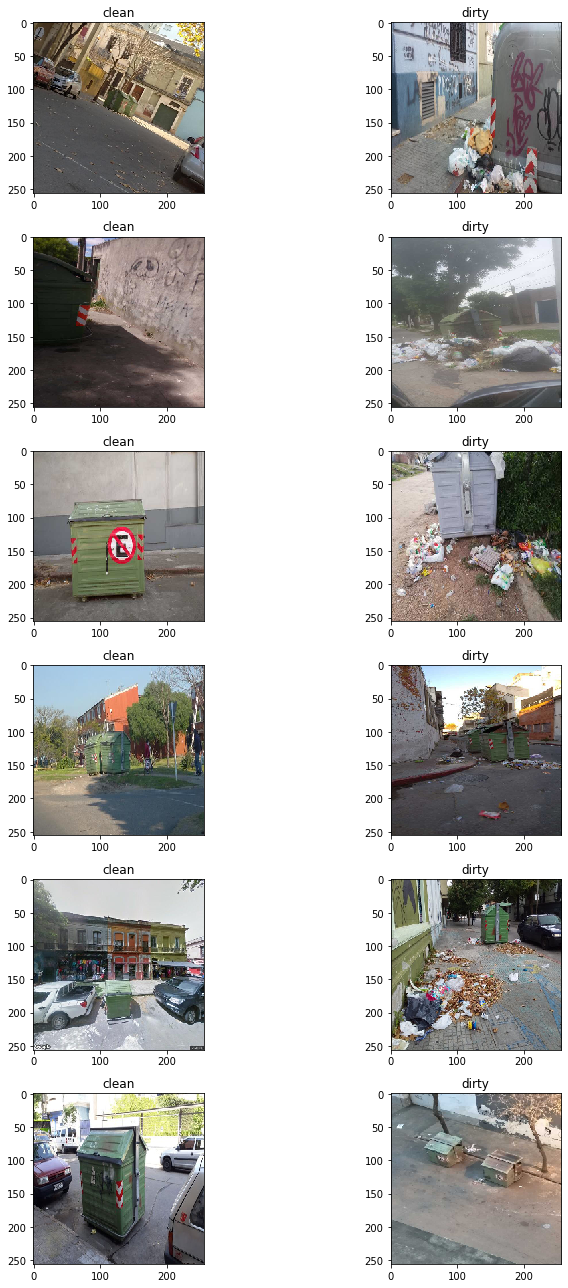

In [5]:
plot_clean_and_dirty_photos(train_it, 6)

example

In [6]:
train_it_all = datagen.flow_from_directory('data/clean-dirty-garbage-containers/train/', class_mode='binary')
test_it_all = datagen.flow_from_directory('data/clean-dirty-garbage-containers/test/', class_mode='binary')

Found 938 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [8]:
#for element in train_it_all:
#    photo, label = element
#    try:
#        print(photo.shape)
#    except:
        

### Image classification model

In [9]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [10]:
input_shape = (256,256,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
train_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/train/', class_mode='binary', batch_size=64)
val_it = datagen.flow_from_directory('data/clean-dirty-garbage-containers/test/', class_mode='binary', batch_size=64)

Found 938 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [18]:
batch_size = 64
epochs = 20

model.fit_generator(
    train_it,
    #steps_per_epoch=nb_train_samples // batch_size,
    steps_per_epoch = 938//batch_size,
    epochs=epochs,
    validation_data=val_it,
    validation_steps=196 // batch_size)

Epoch 1/20
14/14 [==============================] - 13s 900ms/step - loss: 0.6726 - acc: 0.6178 - val_loss: 0.6957 - val_acc: 0.5052
Epoch 2/20
14/14 [==============================] - 13s 893ms/step - loss: 0.6735 - acc: 0.6172 - val_loss: 0.6960 - val_acc: 0.5052
Epoch 3/20
14/14 [==============================] - 13s 908ms/step - loss: 0.6692 - acc: 0.6279 - val_loss: 0.6963 - val_acc: 0.5052
Epoch 4/20
14/14 [==============================] - 12s 880ms/step - loss: 0.6741 - acc: 0.6110 - val_loss: 0.6966 - val_acc: 0.5052
Epoch 5/20
14/14 [==============================] - 12s 888ms/step - loss: 0.6694 - acc: 0.6213 - val_loss: 0.6969 - val_acc: 0.5052
Epoch 6/20
14/14 [==============================] - 12s 862ms/step - loss: 0.6696 - acc: 0.6161 - val_loss: 0.6973 - val_acc: 0.5052
Epoch 7/20
14/14 [==============================] - 12s 842ms/step - loss: 0.6735 - acc: 0.6087 - val_loss: 0.6976 - val_acc: 0.5052
Epoch 8/20
14/14 [==============================] - 12s 859ms/step - 

In [ ]:
model.input_shape

In [ ]:
model.output_shape

In [ ]:
model.summary()

In [13]:
batch_size = 64
epochs = 20

model.fit_generator(
    train_it,
    #steps_per_epoch=nb_train_samples // batch_size,
    steps_per_epoch = 939 // batch_size,
    epochs=epochs)

Epoch 1/20
14/14 [==============================] - 11s 820ms/step - loss: 2777.9239 - acc: 0.5423
Epoch 2/20
14/14 [==============================] - 11s 772ms/step - loss: 138.6374 - acc: 0.5469
Epoch 3/20
14/14 [==============================] - 11s 762ms/step - loss: 1.1442 - acc: 0.6178
Epoch 4/20
14/14 [==============================] - 11s 771ms/step - loss: 0.7612 - acc: 0.6259
Epoch 5/20
14/14 [==============================] - 11s 763ms/step - loss: 1.0321 - acc: 0.5892
Epoch 6/20
14/14 [==============================] - 11s 771ms/step - loss: 0.6863 - acc: 0.6350
Epoch 7/20
14/14 [==============================] - 11s 770ms/step - loss: 0.6844 - acc: 0.6116
Epoch 8/20
14/14 [==============================] - 11s 795ms/step - loss: 0.6835 - acc: 0.6316
Epoch 9/20
14/14 [==============================] - 16s 1s/step - loss: 0.6844 - acc: 0.6087
Epoch 10/20
14/14 [==============================] - 11s 787ms/step - loss: 0.6807 - acc: 0.6068
Epoch 11/20
14/14 [==================

In [ ]:
# Check shape
#photos, label = next(train_it)
#photos.shape

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
#model.fit_generator(np.array(X_train), labels_train, validation_split=0.1, batch_size=15, epochs=20)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))

In [ ]:
model2.summary()

In [ ]:
batch_size = 64
epochs = 20

model.fit_generator(
    train_it,
    #steps_per_epoch=nb_train_samples // batch_size,
    steps_per_epoch = 939 // batch_size,
    epochs=epochs)